### 3. EDA
This part is going to 

In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns

In [74]:
df = pd.read_csv('/Users/liminzhenscc/Documents/study/python_data_analyze/project/2data_sc_salary/glassdoor_jobs_cleaned2.csv')
df.drop('Unnamed: 0', axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1261 non-null   object 
 1   Salary Estimate    1261 non-null   object 
 2   Average Salary     1261 non-null   object 
 3   Job Description    1261 non-null   object 
 4   Rating             1261 non-null   float64
 5   Company Name       1261 non-null   object 
 6   Location           1261 non-null   object 
 7   Size               1261 non-null   object 
 8   Founded            1261 non-null   int64  
 9   Type of ownership  1261 non-null   object 
 10  Industry           1261 non-null   object 
 11  Sector             1261 non-null   object 
 12  Revenue            1261 non-null   object 
 13  min_salary         1261 non-null   int64  
 14  max_salary         1261 non-null   int64  
 15  company_name       1261 non-null   object 
 16  age                1261 

In [75]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Average Salary', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'company_name', 'age', 'python_yn', 'r_yn', 'ML_yn',
       'excel_yn', 'spark_yn', 'aws_yn', 'graduate_yn', 'ave_salary'],
      dtype='object')

In [60]:
title=df['Job Title'].value_counts(sort=True).index.to_list()
title

['Data Scientist',
 'Junior Data Analyst - Western Public Health Unit',
 'Business Intelligence (BI) & Data Warehouse Developer',
 'Software Developers (Real-time Simulation & Machine Technology) – all experience levels, full and part-time',
 'Senior Software Engineer, Site Reliability Engineering - Job Seeker',
 'Software Developer',
 'Data Science Graduate/Undergraduate - Immed Start!',
 'Graduate Data Science - Brisbane (Corporate)',
 'Technology Graduate - 2023',
 'Data Scientists | Simulation | Deep Learning |Baseline | Join VSG Today!',
 'Consulting - Data & AI - 2022/23 Summer Vacationer Program (Canberra)',
 'EOI - Senior Business/Data Analyst - Decision Science & Analytics (Sydney)',
 'Data Graduates, Australian Government',
 'Algorithmic Trading Software Developer',
 'Mergers & Acquisitions (iDeal) - 2023 Graduate Program (Sydney)',
 'Mergers & Acquisitions - 2023 Graduate Program (Perth)',
 'Data Scientist (Optimization Focused)',
 'Forensic Technology - 2023 Graduate Progra

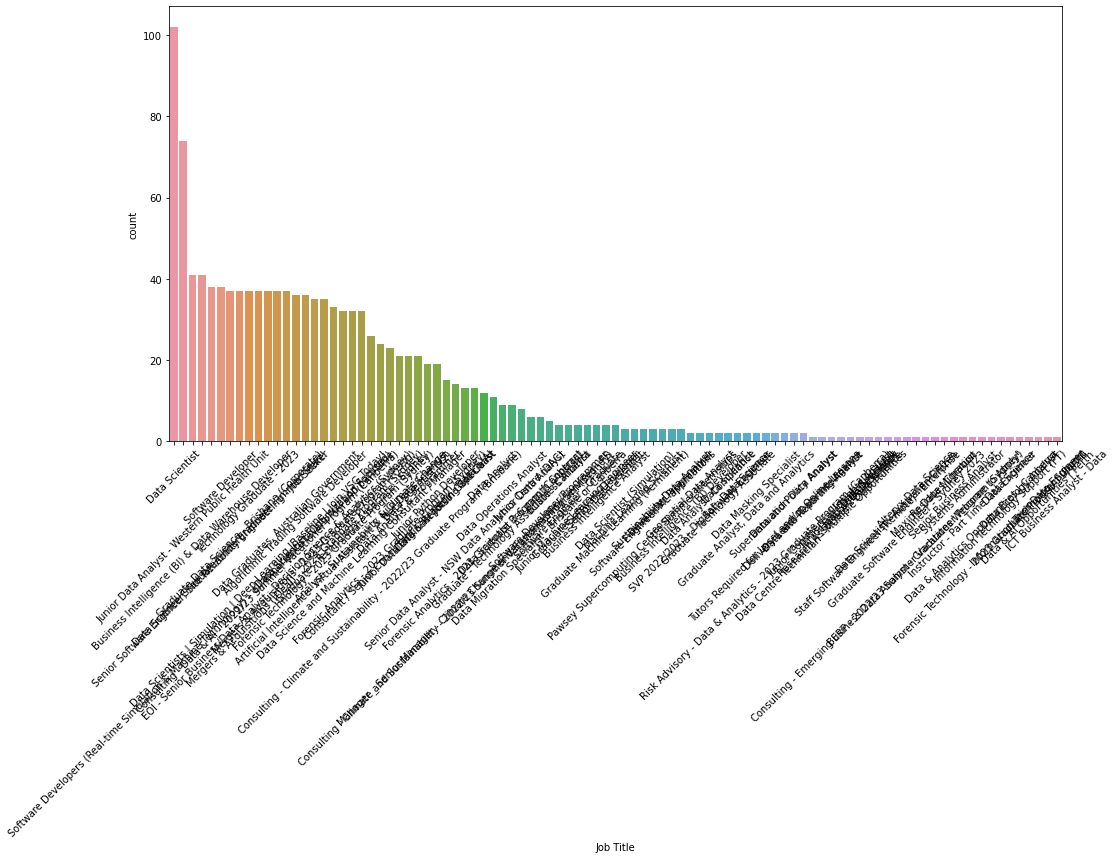

In [61]:
plt.figure(figsize=(16,8))
sns.countplot(x='Job Title', data=df, order=df['Job Title'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [77]:
#simplify job title
def simp_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'developer' in title.lower():
        return 'software developer'
    elif 'data masking' in title.lower():
        return 'data masking'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'consulting' in title.lower():
        return 'consulting'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'research' in title.lower() or 'researcher' in title.lower():
        return 'research'
    elif 'business information' in title.lower() or 'bi' in title.lower():
        return 'business information'
    else:
        return 'na'
#difine the function to decide level of these job
def level(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower() or 'head' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'
        

In [78]:
df['job_simp'] = df['Job Title'].apply(simp_title)
df['job_level'] = df['Job Title'].apply(level)

In [79]:
df.job_level.value_counts()

na        1006
senior     130
junior     125
Name: job_level, dtype: int64

In [80]:
df.job_simp.value_counts()

na                      407
data scientist          245
analyst                 224
software developer      191
consulting               76
business information     51
machine learning         43
data engineer            21
data masking              2
research                  1
Name: job_simp, dtype: int64

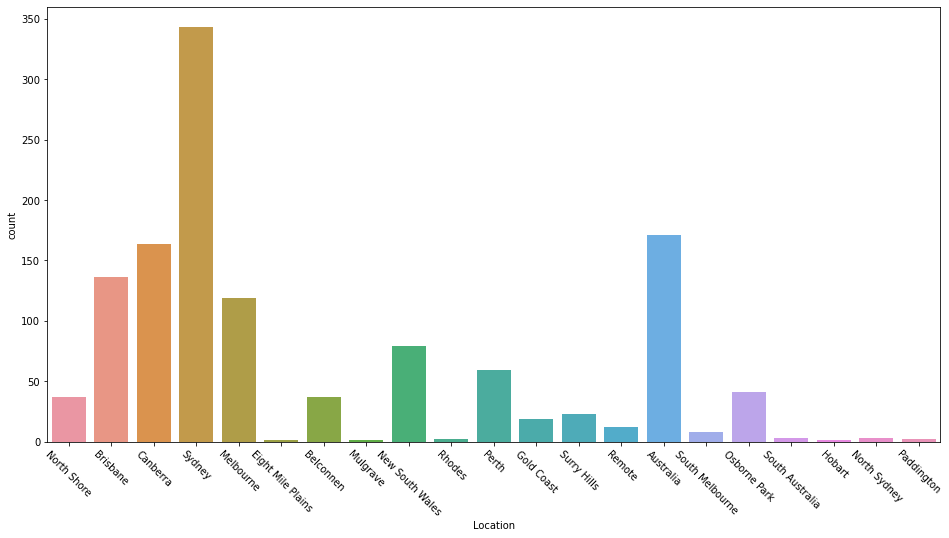

In [83]:
plt.figure(figsize=(16,8))
sns.countplot(x='Location', data=df)
plt.xticks(rotation=-45)
plt.show()

In [84]:
cities = df.Location.value_counts().index.to_list()
len(cities)

21

overall there are several jobs located in 29 different cities, i need to find the state of those cities

In [85]:
#job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [86]:
df.head()

Job Title  \
0  Data Science Graduate/Undergraduate - Immed St...   
1       Graduate Data Science - Brisbane (Corporate)   
2  Consulting - Data & AI - 2022/23 Summer Vacati...   
3                                     Data Scientist   
4                  Research Associate - Data Science   

                 Salary Estimate       Average Salary  \
0  $97K - $141K (Glassdoor Est.)  $116,841 /yr (est.)   
1  $97K - $141K (Glassdoor Est.)  $128,589 /yr (est.)   
2  $97K - $141K (Glassdoor Est.)   $78,167 /yr (est.)   
3  $97K - $141K (Glassdoor Est.)  $125,000 /yr (est.)   
4  $97K - $141K (Glassdoor Est.)  $102,500 /yr (est.)   

                                     Job Description  Rating  \
0  Be part of the Award Winning CIMIC Graduate Pr...     3.8   
1  Job Number:\n82295\nWork type:\nPermanent - Fu...     3.7   
2  Date: 18-Jul-2022\n\nLocation:\nCanberra, ACT,...     4.0   
3  Job description\nData Scientist Skills\nProgra...    -1.0   
4  Job no: 510607\nWork type: Full time\nLocation...     4.2   

                         Company Name     Location                     Size  \
0                    UGL Limited\n3.8  North Shore  5001 to 10000 Employees   
1                        Aurizon\n3.7     Brisbane   1001 to 5000 Employees   
2                       Deloitte\n4.0     Canberra         10000+ Employees   
3            GoTech Solutions Pty Ltd       Sydney                       -1   
4  University of New South Wales\n4.2       Sydney   1001 to 5000 Employees   

   Founded               Type of ownership  ... r_yn ML_yn excel_yn  spark_yn  \
0     1984  Subsidiary or Business Segment  ...    1     0        1         0   
1     2009                Company - Public  ...    1     1        0         0   
2     1850               Company - Private  ...    1     1        1         0   
3       -1                Company - Public  ...    1     1        1         0   
4     1949            College / University  ...    1     1        0         0   

   aws_yn graduate_yn  ave_salary        job_simp  job_level  desc_len  
0       0           1    116841.0              na         na      2319  
1       0           1    128589.0              na         na      4012  
2       0           0     78167.0      consulting         na      3348  
3       0           0    125000.0  data scientist         na      1828  
4       0           0    102500.0        research         na      6499  

[5 rows x 28 columns]

#### start to visualize datasets

In [87]:
df.describe()

Rating      Founded   min_salary   max_salary          age  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean      3.533624  1161.006344    31.734338    37.747026    52.035686   
std       1.576699   950.041519    29.521340    38.192685    68.965516   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%       3.800000    -1.000000    -1.000000    -1.000000    -1.000000   
50%       3.900000  1850.000000    36.000000    36.000000    14.000000   
75%       4.000000  1984.000000    55.000000    82.000000   117.000000   
max       5.000000  2019.000000    97.000000   141.000000   173.000000   

         python_yn    r_yn        ML_yn     excel_yn     spark_yn  \
count  1261.000000  1261.0  1261.000000  1261.000000  1261.000000   
mean      0.343378     1.0     0.279144     0.348136     0.020619   
std       0.475025     0.0     0.448756     0.476569     0.142160   
min       0.000000     1.0     0.000000     0.000000     0.000000   
25%       0.000000     1.0     0.000000     0.000000     0.000000   
50%       0.000000     1.0     0.000000     0.000000     0.000000   
75%       1.000000     1.0     1.000000     1.000000     0.000000   
max       1.000000     1.0     1.000000     1.000000     1.000000   

            aws_yn  graduate_yn     ave_salary      desc_len  
count  1261.000000  1261.000000    1261.000000   1261.000000  
mean      0.051546     0.295797  101050.212530   3522.008723  
std       0.221197     0.456581   44237.402283   1527.683315  
min       0.000000     0.000000      65.000000    114.000000  
25%       0.000000     0.000000   72849.000000   2836.000000  
50%       0.000000     0.000000   93247.000000   3426.000000  
75%       0.000000     1.000000  121491.000000   4497.000000  
max       1.000000     1.000000  240000.000000  12946.000000

In [99]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Average Salary', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'company_name', 'age', 'python_yn', 'r_yn', 'ML_yn',
       'excel_yn', 'spark_yn', 'aws_yn', 'graduate_yn', 'ave_salary',
       'job_simp', 'job_level', 'desc_len'],
      dtype='object')

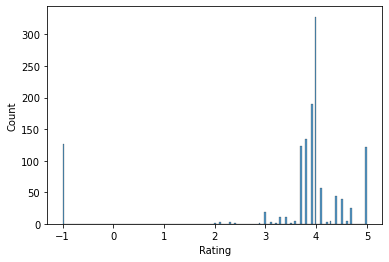

In [92]:
sns.histplot(data=df, x='Rating')
plt.show()

<AxesSubplot:xlabel='ave_salary', ylabel='Count'>

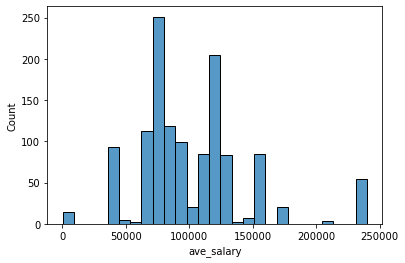

In [93]:
sns.histplot(df.ave_salary)

<AxesSubplot:ylabel='Rating'>

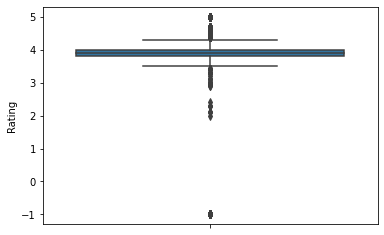

In [95]:
sns.boxplot(y='Rating', data = df)

<AxesSubplot:ylabel='age'>

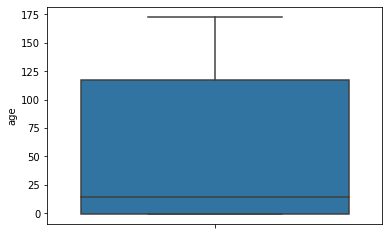

In [96]:
sns.boxplot(y='age', data=df)

correlation map:

In [97]:
corr = df[['age','ave_salary', 'desc_len', 'Rating']].corr()
corr

age  ave_salary  desc_len    Rating
age         1.000000   -0.115285  0.101476  0.211949
ave_salary -0.115285    1.000000  0.019452  0.110445
desc_len    0.101476    0.019452  1.000000  0.073306
Rating      0.211949    0.110445  0.073306  1.000000

<AxesSubplot:>

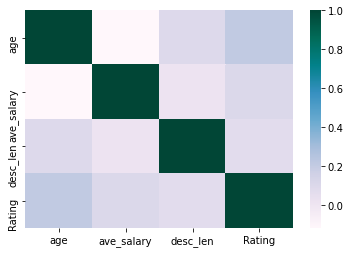

In [98]:
sns.heatmap(corr, cmap='PuBuGn')

pivot table of data, show the relationship of ave_salary with categorical variables

In [100]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Average Salary', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'company_name', 'age', 'python_yn', 'r_yn', 'ML_yn',
       'excel_yn', 'spark_yn', 'aws_yn', 'graduate_yn', 'ave_salary',
       'job_simp', 'job_level', 'desc_len'],
      dtype='object')

In [116]:
cat_col = ['Size', 'Location', 'Type of ownership', 'Industry', 'Sector', 
                  'Revenue', 'company_name','python_yn', 'r_yn', 'ML_yn','excel_yn', 'spark_yn', 
                  'aws_yn', 'graduate_yn','job_simp', 'job_level']

In [117]:
for i in cat_col:
    print('pivot table for: ', i, )
    print(df.pivot_table(index = i, values = 'ave_salary').sort_values('ave_salary', ascending=False))

pivot table for:  Size
                            ave_salary
Size                                  
1001 to 5000 Employees   119412.717241
-1                       119131.289474
1 to 50 Employees        108060.645833
501 to 1000 Employees    102872.894737
51 to 200 Employees       98825.852273
201 to 500 Employees      98222.533333
10000+ Employees          94382.160804
5001 to 10000 Employees   85759.659483
pivot table for:  Location
                      ave_salary
Location                        
Paddington         128452.000000
Belconnen          125010.135135
Canberra           121437.621951
South Melbourne    120000.000000
North Shore        116841.000000
Australia          114456.391813
Rhodes             111250.000000
Brisbane           101246.647059
Sydney              98920.708455
Remote              98469.166667
Osborne Park        88746.780488
North Sydney        86369.000000
Eight Mile Plains   85000.000000
Melbourne           84121.126050
Perth               83533.576271

In [118]:
df.to_csv('/Users/liminzhenscc/Documents/study/python_data_analyze/project/2data_sc_salary/glassdoor_jobs_eda.csv')
